# Practical Assignment 1

In this assignment an MLP is trained on the MNIST dataset. The MNIST dataset (provided by Yann Lecun) consists of handwritten digits of which an example is shown in figure 1. 

The MLP (multi layer perceptron) is trained for 20 epochs with a batch size of 32. The network consists of 1 hidden layer with 10 units. 

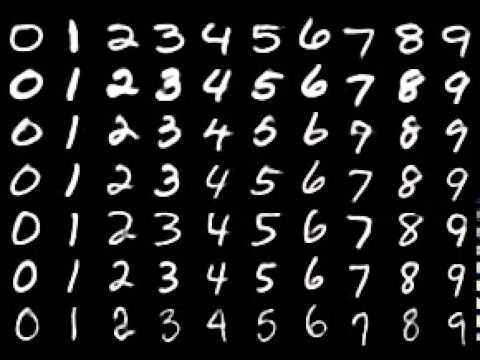

Figure 1

#### Imports

In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from utils import RandomIterator, get_mnist #as provided in the course
import matplotlib.pyplot as plt
import matplotlib

####  Defining the network
In the class below the structure of the MLP is defined.


In [2]:
class MLP(Chain):
    """
    
    Implementation of a 3-layer Multilayer Perceptron
    
    """
    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units) # Input layer n_units -> n_units
            self.l2 = L.Linear(None, n_units)
            self.l3 = L.Linear(n_units, n_out)
        
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        output = self.l3(h2)
        return output
  
class Classifier(Chain):
    """
    Classifier chain on top of MLP chain 
    for accuracy evaluation and prediction
    
    """
    def __init__(self, predictor):
        super(Classifier, self).__init__()
        with self.init_scope():
            self.predictor = predictor
    
    def __call__(self, x, t):
        y = self.predictor(x)
        loss = F.softmax_cross_entropy(y, t)
        accuracy = F.accuracy(y, t)
        report({'loss': loss, 'accuracy': accuracy}, self)
        return loss


#### Training and test set creation

In [3]:
# Retrieve train & test data      
train, test = get_mnist()
# split test inputs and labels
inputs, labels = np.array([tup[0] for tup in test]), np.array([tup[1] for tup in test])
# Set up model & classifier
model = MLP(10,10)
classifier = Classifier(model)
optimizer = optimizers.SGD()
optimizer.setup(classifier)

#### Implement the training & test loop


In [4]:
iterator = RandomIterator(train,32)

av_loss = []
ep_loss = []
test_loss = []
nr_of_epochs = 20
for epoch in range(1,nr_of_epochs):
     for batch in iterator:
        sources,targets = batch[0], batch[1]
        classifier.cleargrads()
        loss = F.sum(classifier(sources, targets))
        loss.backward()
        av_loss.append(loss.data)    
        optimizer.update()
     loss =  sum(av_loss) / len(av_loss)
     print({'epoch': epoch, 'train_loss': loss})
     ep_loss.append({'epoch': epoch, 'loss': loss})
     # test classifier
     loss = F.sum(classifier(inputs, labels))
     print({'epoch': epoch, 'test_loss': float(loss.data)})
     test_loss.append({'epoch': epoch, 'loss': loss.data})
     av_loss = []

{'epoch': 1, 'train_loss': 2.290019581394811}
{'epoch': 1, 'test_loss': 2.261646032333374}
{'epoch': 2, 'train_loss': 2.2230828423653879}
{'epoch': 2, 'test_loss': 2.1917319297790527}
{'epoch': 3, 'train_loss': 2.133433134325089}
{'epoch': 3, 'test_loss': 2.1115052700042725}
{'epoch': 4, 'train_loss': 2.0415900407298917}
{'epoch': 4, 'test_loss': 2.030327081680298}
{'epoch': 5, 'train_loss': 1.948109922870513}
{'epoch': 5, 'test_loss': 1.9557244777679443}
{'epoch': 6, 'train_loss': 1.8654718937412385}
{'epoch': 6, 'test_loss': 1.882301688194275}
{'epoch': 7, 'train_loss': 1.789168365540043}
{'epoch': 7, 'test_loss': 1.815678596496582}
{'epoch': 8, 'train_loss': 1.716074735887589}
{'epoch': 8, 'test_loss': 1.753198504447937}
{'epoch': 9, 'train_loss': 1.6473672120801863}
{'epoch': 9, 'test_loss': 1.6937986612319946}
{'epoch': 10, 'train_loss': 1.5847923255735827}
{'epoch': 10, 'test_loss': 1.636449933052063}
{'epoch': 11, 'train_loss': 1.5141952576175812}
{'epoch': 11, 'test_loss': 1.57

#### Plotting training and test loss versus epoch

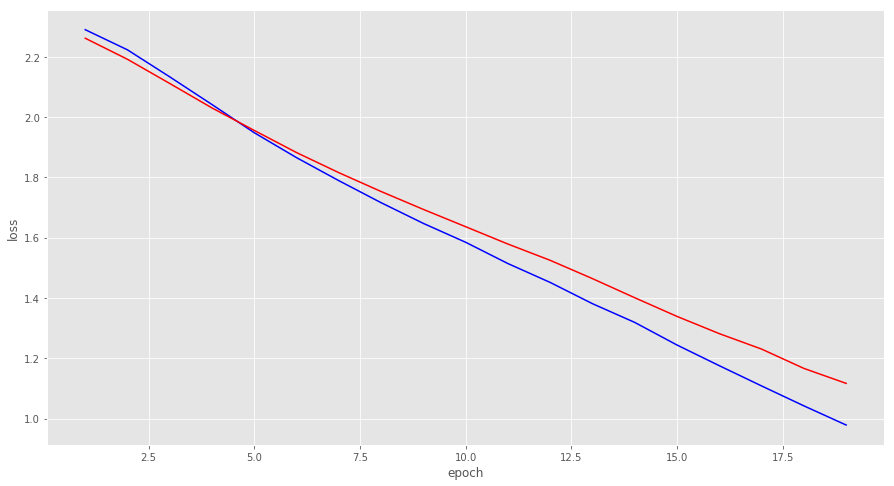

In [5]:
matplotlib.style.use('ggplot')
figure = plt.figure(figsize=(15,8))
ax = figure.add_subplot(111)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
e_train, l_train = [point['epoch'] for point in ep_loss], [point['loss'] for point in ep_loss]
e_test, l_test = [point['epoch'] for point in test_loss], [point['loss'] for point in test_loss]
plt.plot(e_train, l_train, 'b')
plt.plot(e_test, l_test, 'r')
plt.show() 